# Directional Wells Trayectories - Visualization

# Import Python Libraries

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [5]:
Well_file = "Data/input/F-15/1.xml"
with open(Well_file) as file:
    data = file.read()

# Data Processing

In [8]:
data_xml = BeautifulSoup(data, 'html.parser')

In [13]:
float(data_xml.find_all("dispns")[1].text)

-3.17

In [14]:
float(data_xml.find_all("incl")[2].text)

0.00261799398216206

In [16]:
incl = data_xml.find_all("incl")
float(incl[3].text)

0.00488692192665297

In [23]:
params = []
for tag in data_xml.find_all():
    params.append(tag.name)
len(params)

2257

In [24]:
params = set(params)
len(params)

44

In [25]:
params = set([str(tag.name) for tag in data_xml.find_all()])
len(params)

44

In [26]:
tvd = data_xml.find_all("tvd")
float(tvd[2].text)

153.399985329122

In [27]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
df = pd.DataFrame()
for col in columns:
    df[col] = [float(x.text) for x in data_xml.find_all(col)] 

df 

,azi,incl,md,tvd,dispns,dispew
0,0.000000,0.000000,0.000000,0.000000,-3.170000,3.530000
1,0.000000,0.000000,145.899994,145.899994,-3.170000,3.530000
2,4.427726,0.002618,153.399994,153.399985,-3.172757,3.520578
3,2.548530,0.004887,234.199997,234.199627,-3.366177,3.529412
4,2.377313,0.013614,274.600006,274.597786,-3.646544,3.774881
...,...,...,...,...,...,...
75,4.469265,0.382925,3118.280029,2938.419040,-699.230295,-217.451880
76,4.471534,0.390081,3158.540039,2975.709107,-702.866857,-232.185777
77,4.470487,0.371232,3199.020020,3013.291014,-706.461696,-246.789120
78,4.460363,0.366170,3211.780029,3025.193506,-707.585751,-251.248326


In [28]:
df.head()

,azi,incl,md,tvd,dispns,dispew
0,0.000000,0.000000,0.000000,0.000000,-3.170000,3.530000
1,0.000000,0.000000,145.899994,145.899994,-3.170000,3.530000
2,4.427726,0.002618,153.399994,153.399985,-3.172757,3.520578
3,2.548530,0.004887,234.199997,234.199627,-3.366177,3.529412
4,2.377313,0.013614,274.600006,274.597786,-3.646544,3.774881


In [29]:
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']

preffix = "Data/input/"
suffix = "/1.xml"

df_all_wells = pd.DataFrame()
for well in wells:
    df = pd.DataFrame()
    WITSML_file = preffix + well + suffix
    with open(WITSML_file) as f:
        data = f.read()
    data_xml = BeautifulSoup(data, 'html.parser')
    for col in columns:
        df[col] = [float(x.text) for x in data_xml.find_all(col)]
    df['Well'] = well
    df_all_wells = pd.concat([df_all_wells, df], ignore_index=True)

In [31]:
df_all_wells.head()

,azi,incl,md,tvd,dispns,dispew,Well
0,0.000000,0.000000,0.000000,0.000000,3.170000,-3.530000,F-1 C
1,0.000000,0.000000,210.699997,210.699997,3.170000,-3.530000,F-1 C
2,5.275083,0.032114,237.600006,237.595383,3.400403,-3.895308,F-1 C
3,5.318018,0.033336,251.100006,251.088156,3.644096,-4.263587,F-1 C
4,5.336519,0.043110,264.899994,264.878010,3.948795,-4.693964,F-1 C


In [32]:
df_all_wells["Well"].unique()

array(['F-1 C', 'F-4', 'F-5', 'F-7', 'F-9', 'F-11', 'F-12', 'F-14',
       'F-15'], dtype=object)

In [33]:
df_all_wells.shape

(861, 7)

In [34]:
df_all_wells.loc[df_all_wells['Well'] == 'F-12', ['azi', "incl", "md", "Well"]]

,azi,incl,md,Well
475,0.000000,0.000000,0.000000,F-12
476,0.000000,0.000000,145.899994,F-12
477,2.900912,0.002094,174.000000,F-12
478,2.788861,0.001396,204.000000,F-12
479,1.976934,0.002618,234.000000,F-12
...,...,...,...,...
682,1.860346,0.925199,3375.409912,F-12
683,1.867851,0.927468,3416.550049,F-12
684,1.862964,0.924501,3456.149902,F-12
685,1.842893,0.922756,3495.520020,F-12


In [41]:
df_group = df_all_wells.groupby('Well')['md'].mean().reset_index()
df_group

,Well,md
0,F-1 C,1680.828890
1,F-11,2055.355497
2,F-12,1705.767971
3,F-14,1940.982018
4,F-15,1692.437750
5,F-4,1823.509203
6,F-5,1958.233773
7,F-7,457.161190
8,F-9,637.872396


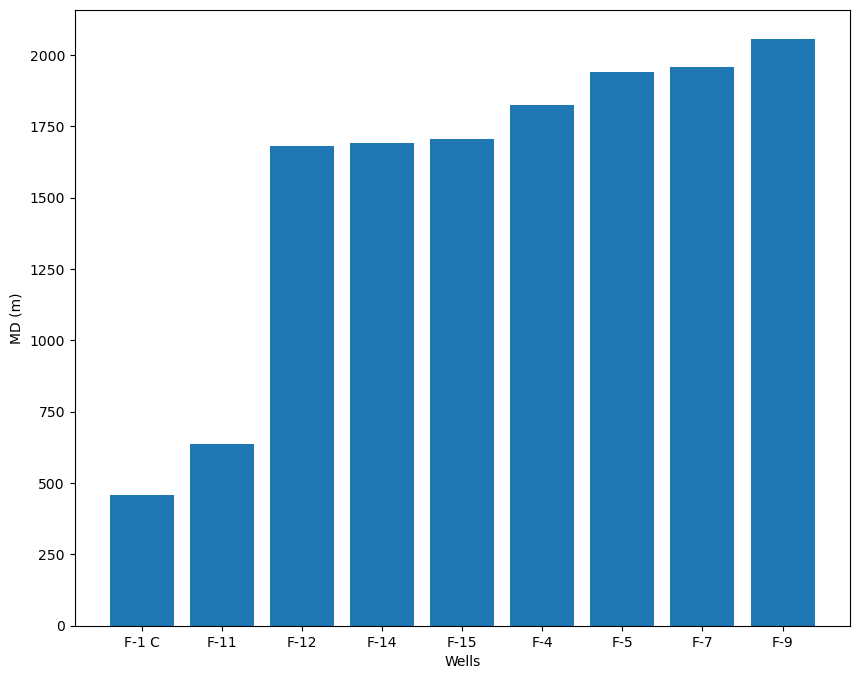

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))

md_order = df_group.sort_values(by=["md"], ascending=True)

ax.bar(x=df_group["Well"], height=md_order["md"])

ax.set_xlabel("Wells")
ax.set_ylabel("MD (m)")

plt.show()

In [47]:
df_all_wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   azi     861 non-null    float64
 1   incl    861 non-null    float64
 2   md      861 non-null    float64
 3   tvd     861 non-null    float64
 4   dispns  861 non-null    float64
 5   dispew  861 non-null    float64
 6   Well    861 non-null    object 
dtypes: float64(6), object(1)
memory usage: 47.2+ KB


# Convert to negative all TVD Values

In [48]:
df_all_wells['neg_tvd'] = df_all_wells['tvd']*-1

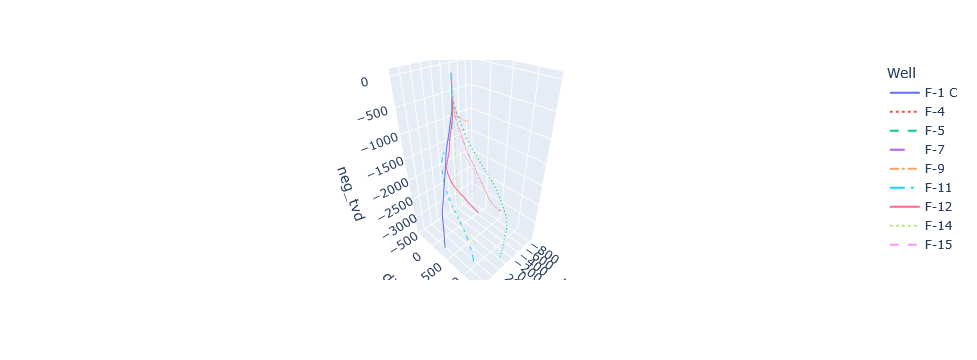

In [50]:
fig = px.line_3d(df_all_wells, 'dispns', 'dispew', 'neg_tvd', color="Well", line_dash="Well")
fig.show()

# Plot well F-14

In [ ]:
df_all_wells[df_all_wells['Well']=='F-14']

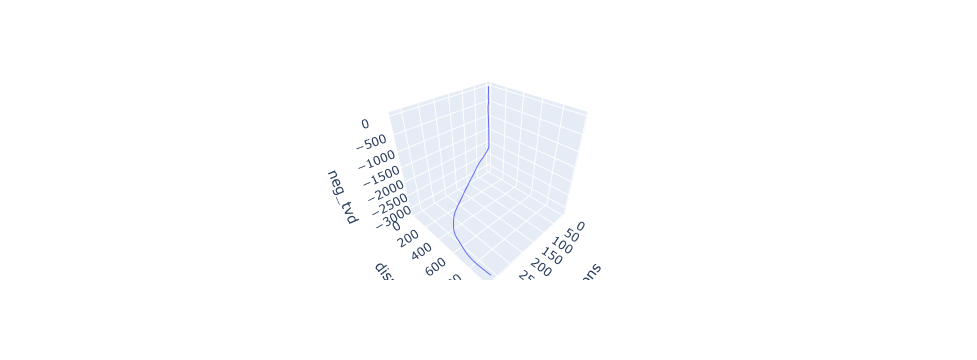

In [51]:
fig_14 = px.line_3d(df_all_wells[df_all_wells['Well']=='F-14'], 'dispns', 'dispew', 'neg_tvd')
fig_14.show()

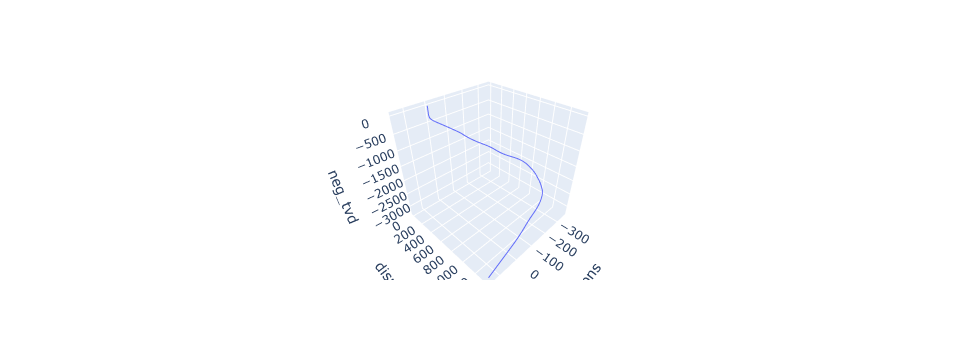

In [52]:
fig_5 = px.line_3d(df_all_wells[df_all_wells['Well']=='F-5'], 'dispns', 'dispew', 'neg_tvd')
fig_5.show()

# Output

Conver xml files to csv files

In [53]:
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']

preffix = "Data/output/"
suffix = ".csv"

for well in wells:
    df = df_all_wells[df_all_wells['Well']==well]
    df.to_csv(preffix + well + suffix, index=False)

# EDA (EXploratory Data Analysis)

In [54]:
df_all_wells

,azi,incl,md,tvd,dispns,dispew,Well,neg_tvd
0,0.000000,0.000000,0.000000,0.000000,3.170000,-3.530000,F-1 C,-0.000000
1,0.000000,0.000000,210.699997,210.699997,3.170000,-3.530000,F-1 C,-210.699997
2,5.275083,0.032114,237.600006,237.595383,3.400403,-3.895308,F-1 C,-237.595383
3,5.318018,0.033336,251.100006,251.088156,3.644096,-4.263587,F-1 C,-251.088156
4,5.336519,0.043110,264.899994,264.878010,3.948795,-4.693964,F-1 C,-264.878010
...,...,...,...,...,...,...,...,...
856,4.469265,0.382925,3118.280029,2938.419040,-699.230295,-217.451880,F-15,-2938.419040
857,4.471534,0.390081,3158.540039,2975.709107,-702.866857,-232.185777,F-15,-2975.709107
858,4.470487,0.371232,3199.020020,3013.291014,-706.461696,-246.789120,F-15,-3013.291014
859,4.460363,0.366170,3211.780029,3025.193506,-707.585751,-251.248326,F-15,-3025.193506


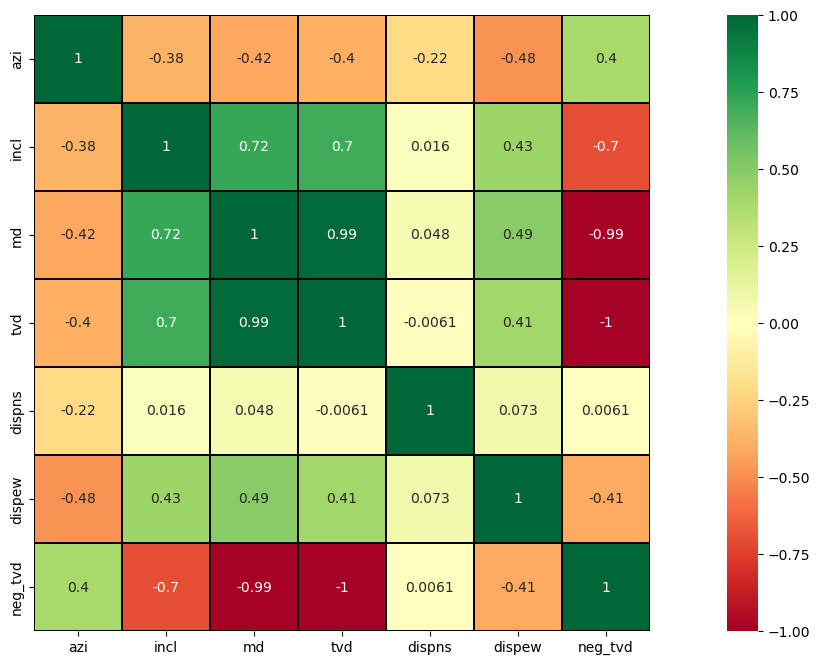

In [58]:
corr = df_all_wells[["azi", "incl", "md", "tvd", "dispns", "dispew", "neg_tvd"]].corr()

fig, ax1 = plt.subplots(figsize=(20,8))
sns.heatmap(data=corr, cmap='RdYlGn', annot=True, linewidths=0.01, linecolor='black', square=True, ax=ax1)
plt.show()

## Plots for Categorical Variables

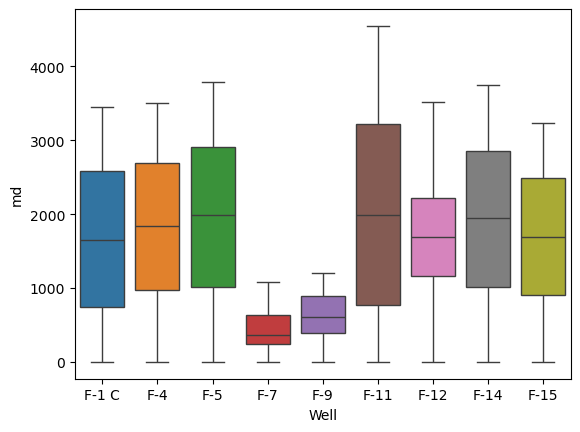

In [63]:
sns.boxplot(data=df_all_wells, x='Well', y='md', hue="Well")

plt.show()

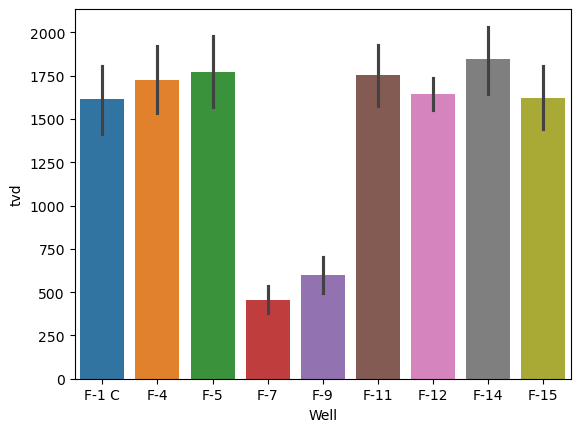

In [64]:
sns.barplot(data=df_all_wells, x='Well', y='tvd', hue="Well")

plt.show()

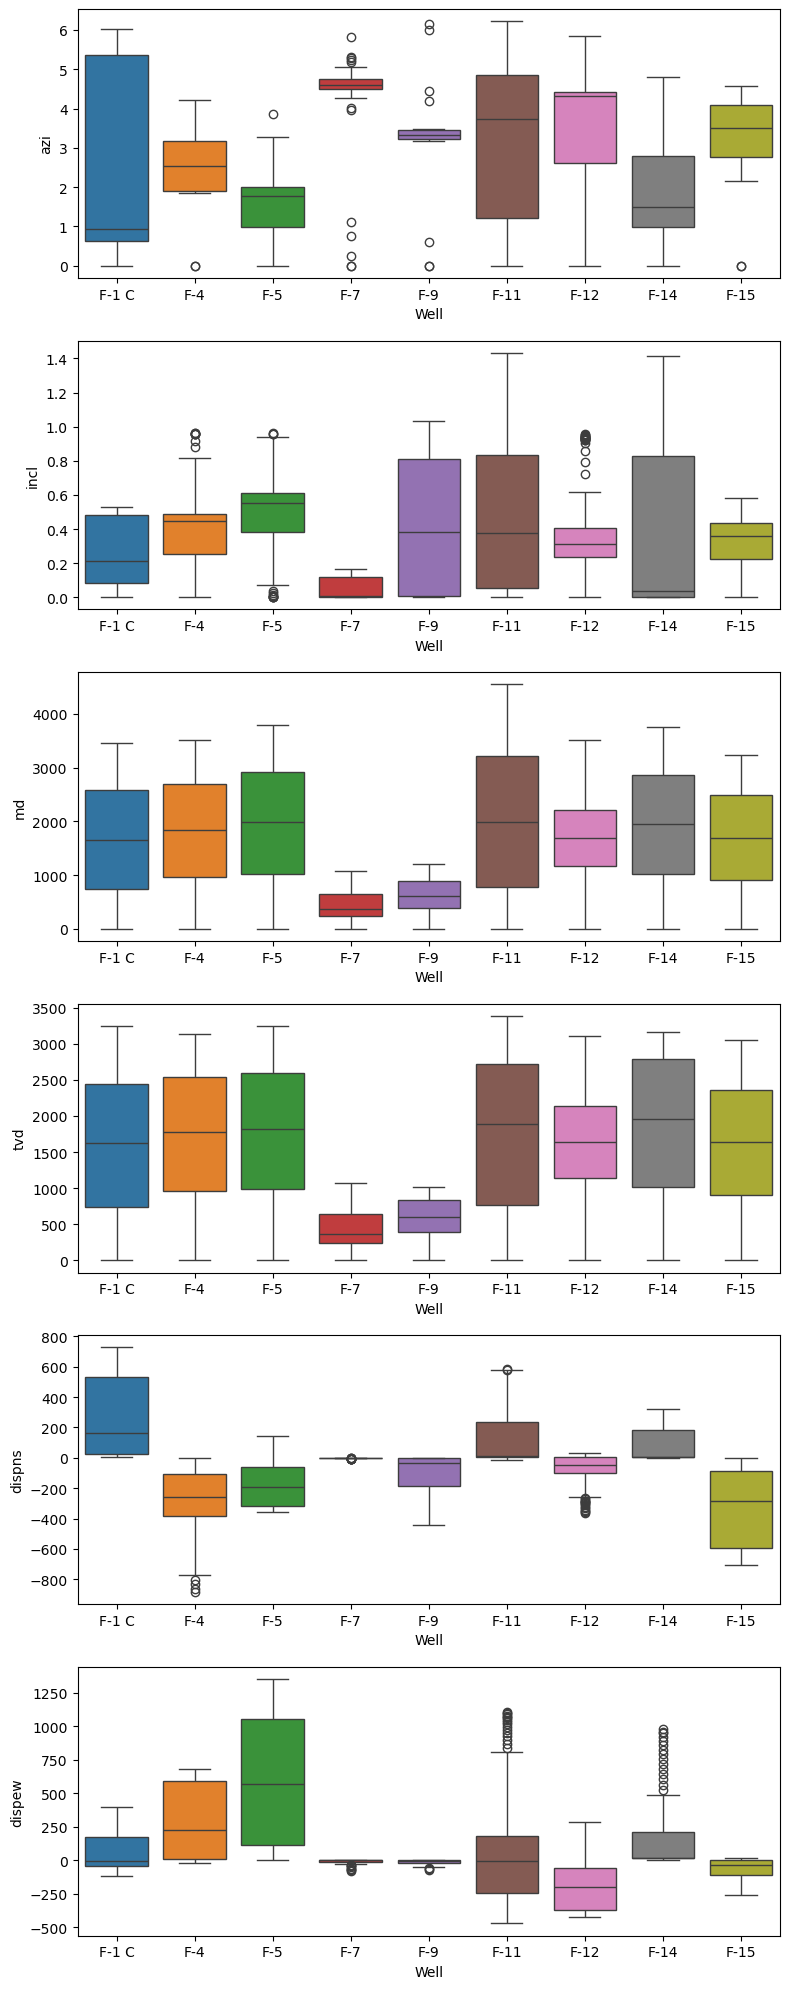

In [65]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
fig, ax = plt.subplots(len(columns), 1, figsize=(8,20))

for col, axes in zip(columns, ax):
    sns.boxplot(data=df_all_wells, x='Well', y=col, ax=axes, hue="Well")
    plt.tight_layout()